In [10]:
import sys, os
from pathlib import Path
import numpy as np

_cwd = Path.cwd()
sys.path.insert(0, str(_cwd.parent.parent / 'nlp-toolbox'))

from causalbenchmark import util
from causalbenchmark.graphs import create_graph
from causalnlp import ci_relation_check

In [11]:
ci_relation_check

<module 'causalnlp.ci_relation_check' from '/is/ei/fleeb/workspace/code/projects/nlp-toolbox/causalnlp/ci_relation_check/__init__.py'>

In [15]:
phenomena = [p.stem for p in (util.config_root() / 'new' / 'phenomena').glob('*.yml')]
phenomena

['IV',
 'arrowhead',
 'chain',
 'collision',
 'confounding',
 'det-diamond',
 'det-diamondcut',
 'det-triangle',
 'det-twocauses',
 'frontdoor',
 'mediation',
 'nondet-diamond',
 'nondet-diamondcut']

In [17]:
adjs = {}
for phen in phenomena:
	config = util.load_phenomenon_from_config(phen)
	bset = ci_relation_check.generate_all_backdoor_set(config['graph'].replace(',', '\n'), 'X', 'Y')
	adjs[phen] = bset
adjs

{'IV': [['V1'], ['V1', 'V2']],
 'arrowhead': [[], ['V2'], ['V1'], ['V1', 'V2']],
 'chain': [[], ['V3'], ['V1'], ['V1', 'V3']],
 'collision': [[], ['V2'], ['V1'], ['V1', 'V2']],
 'confounding': [['V1'], ['V1', 'V3'], ['V1', 'V2'], ['V1', 'V2', 'V3']],
 'det-diamond': [[], ['V1']],
 'det-diamondcut': [['V3'],
  ['V2', 'V3'],
  ['V1'],
  ['V1', 'V3'],
  ['V1', 'V2'],
  ['V1', 'V2', 'V3']],
 'det-triangle': [[],
  ['V3'],
  ['V2'],
  ['V2', 'V3'],
  ['V1'],
  ['V1', 'V3'],
  ['V1', 'V2'],
  ['V1', 'V2', 'V3']],
 'det-twocauses': [[],
  ['V3'],
  ['V2'],
  ['V2', 'V3'],
  ['V1'],
  ['V1', 'V3'],
  ['V1', 'V2'],
  ['V1', 'V2', 'V3']],
 'frontdoor': [['V1'], ['V1', 'V2']],
 'mediation': [[], ['V3'], ['V1'], ['V1', 'V3']],
 'nondet-diamond': [[], ['V1']],
 'nondet-diamondcut': [['V3'],
  ['V2', 'V3'],
  ['V1'],
  ['V1', 'V3'],
  ['V1', 'V2'],
  ['V1', 'V2', 'V3']]}

In [20]:
# ci_relation_check.generate_all_backdoor_set(config['graph'].replace(',', '\n'), 'X', 'Y')

In [18]:
from causalgraphicalmodels import CausalGraphicalModel

In [21]:
g = create_graph(phenomena[0])
ng = g.to_networkx()

In [23]:
ng.edges

OutEdgeView([('V2', 'X'), ('V1', 'X'), ('V1', 'Y'), ('X', 'Y')])

In [27]:
ci_relation_check.generate_all_backdoor_set('\n'.join('->'.join(e) for e in ng.edges), 'X', 'Y')

[['V1'], ['V1', 'V3'], ['V1', 'V2'], ['V1', 'V2', 'V3']]

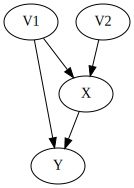

In [25]:
cg = CausalGraphicalModel(
    nodes=list(ng.nodes),
    edges=list(ng.edges),
)
cg.draw()

In [26]:
cg.get_all_backdoor_adjustment_sets('X', 'Y')

frozenset({frozenset({'V1'}), frozenset({'V1', 'V2'})})

In [30]:
adjs2 = {}
for phen in phenomena:
	g = create_graph(phen)
	ng = g.to_networkx()
	cg = CausalGraphicalModel(nodes=list(ng.nodes), edges=list(ng.edges))
	adjs2[phen] = list(map(list,cg.get_all_backdoor_adjustment_sets('X', 'Y')))
adjs2

{'IV': [['V1'], ['V2', 'V1']],
 'arrowhead': [[], ['V2']],
 'chain': [[]],
 'collision': [[]],
 'confounding': [['V1']],
 'det-diamond': [[]],
 'det-diamondcut': [['V3'], ['V1', 'V3'], ['V1']],
 'det-triangle': [[]],
 'det-twocauses': [[], ['V2']],
 'frontdoor': [['V1']],
 'mediation': [[]],
 'nondet-diamond': [[]],
 'nondet-diamondcut': [['V3'], ['V1', 'V3'], ['V1']]}